## Linear Regression Use Sklearn

In [6]:
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

boston = fetch_openml(name='boston')
boston.data

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [2]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
X = df.values
y = boston.target

In [10]:
from sklearn.linear_model import  LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [13]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [14]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

np.float64(20.72402343733968)

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
/var/folders/qs/yv9qfz453r3040csr9b9fgs40000gn/T/ipykernel_20534/3122676059.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted prices: $\hat{Y}_i$")
/var/folders/qs/yv9qfz453r3040csr9b9fgs40000gn/T/ipykernel_20534/3122676059.py:4: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

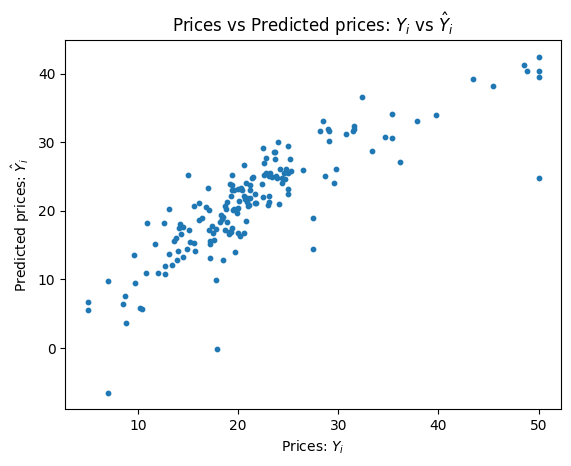

In [15]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Linear Regression with SGD

In [40]:
from sklearn.linear_model import SGDRegressor

lr_SGD = SGDRegressor(eta0=0.000001, max_iter=1000000000, tol=1e-6, learning_rate='constant')

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
# SGD를 쓰려 한다면 스케일링을 웬만하면 꼭 해줘야 한다. 속도도 빨라짐
X_scaled = std_scaler.transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [43]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(eta0=1e-06, learning_rate='constant', max_iter=1000000000,
             tol=1e-06)

In [44]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(np.float64(4.59024810900404), np.float64(21.07037770221517))

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
/var/folders/qs/yv9qfz453r3040csr9b9fgs40000gn/T/ipykernel_20534/3122676059.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted prices: $\hat{Y}_i$")
/var/folders/qs/yv9qfz453r3040csr9b9fgs40000gn/T/ipykernel_20534/3122676059.py:4: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

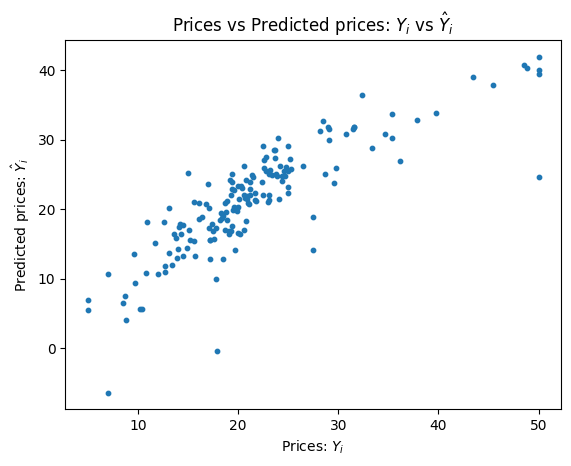

In [45]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Linear Regression with Ridge & Lasso regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# 이런 모델들도 쓸 수 있음
# ridge = Ridge(fit_intercept=True, alpha=0.5)
# ridge.fit(X_train,y_train)
# lasso = Lasso(fit_intercept=True, alpha=0.5)